### DEPENDENCIES

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
from scipy.io import loadmat
import numpy

: 

# DATA LOADER

### Configurations

In [ ]:
INPUT_STEPS = 100
OUTPUT_STEPS = 5 # Missing 5% data.


FOLDER_PATH = r"./Data/Z24"
SELECTED_SENSOR = 1 # 1, 2, 3, 4, 5, 6

# Số lượng mẫu mong muốn cho cả 3 tập Train, Validate, Test: 10.000 samples.
# num_samples = T - (input_length + output_length) + 1
# T = num_samples + (input_length + output_length) - 1
DESIGN_SAMPLES = 10000
STEP_START = 20000
STEP_FINISH = STEP_START + DESIGN_SAMPLES + (INPUT_STEPS + OUTPUT_STEPS) - 1


: 

### Read each file

In [ ]:
import os
from scipy.io import loadmat
import numpy as np

mat_files = sorted([f for f in os.listdir(FOLDER_PATH) if f.endswith('.mat')])
print(f"🔍 Phát hiện {len(mat_files)} file .mat trong {FOLDER_PATH}")
# Danh sách để chứa dữ liệu đã cắt
all_data = []

for file_name in mat_files:
    file_path = os.path.join(FOLDER_PATH, file_name)
    mat_data = loadmat(file_path)
    
    if 'data' in mat_data:
        data_matrix = mat_data['data']
        trimmed_data = data_matrix[:64000, :]  # Cắt 64000 hàng
        if trimmed_data.shape[1] != 27:
            print(f"Lỗi số cột trong {file_name}: {trimmed_data.shape}")
            continue
        all_data.append(trimmed_data)
    else:
        print(f"{file_name} không chứa key 'data'")

# Gộp lại thành ma trận 3 chiều
final_array = np.stack(all_data, axis=0)
final_array = np.swapaxes(final_array, 1, 2)
print("Shape sau cùng:", final_array.shape) #Shape sau cùng: (17 cases, 27 sensors, 64000 timesteps)


🔍 Phát hiện 17 file .mat trong ./Data/Z24
Shape sau cùng: (17, 27, 64000)


: 

## EXTRACT DATA

In [ ]:
separated_cases = []  # Danh sách chứa từng case

for i in range(final_array.shape[0]):  # Duyệt qua từng case
    case_data = final_array[i]  # shape (27, 64000)
    separated_sensors = [case_data[j] for j in range(case_data.shape[0])]  # 27 sensor (mỗi sensor là 1 array 64000)
    separated_cases.append(separated_sensors)
    
print(len(separated_cases))               # 17
print(len(separated_cases[0]))           # 27
print(separated_cases[0][0].shape)       # (64000,)

17
27
(64000,)


: 

## PLOT DATA

(27, 64000)
2
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Sensor 1 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 2 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 3 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 4 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 5 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 6 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 7 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 8 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 9 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 10 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 11 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 12 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 13 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 14 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 15 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 16 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 17 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 18 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 19 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 20 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 21 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 22 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 23 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 24 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 25 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 26 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'Sensor 27 after Slice')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Value')

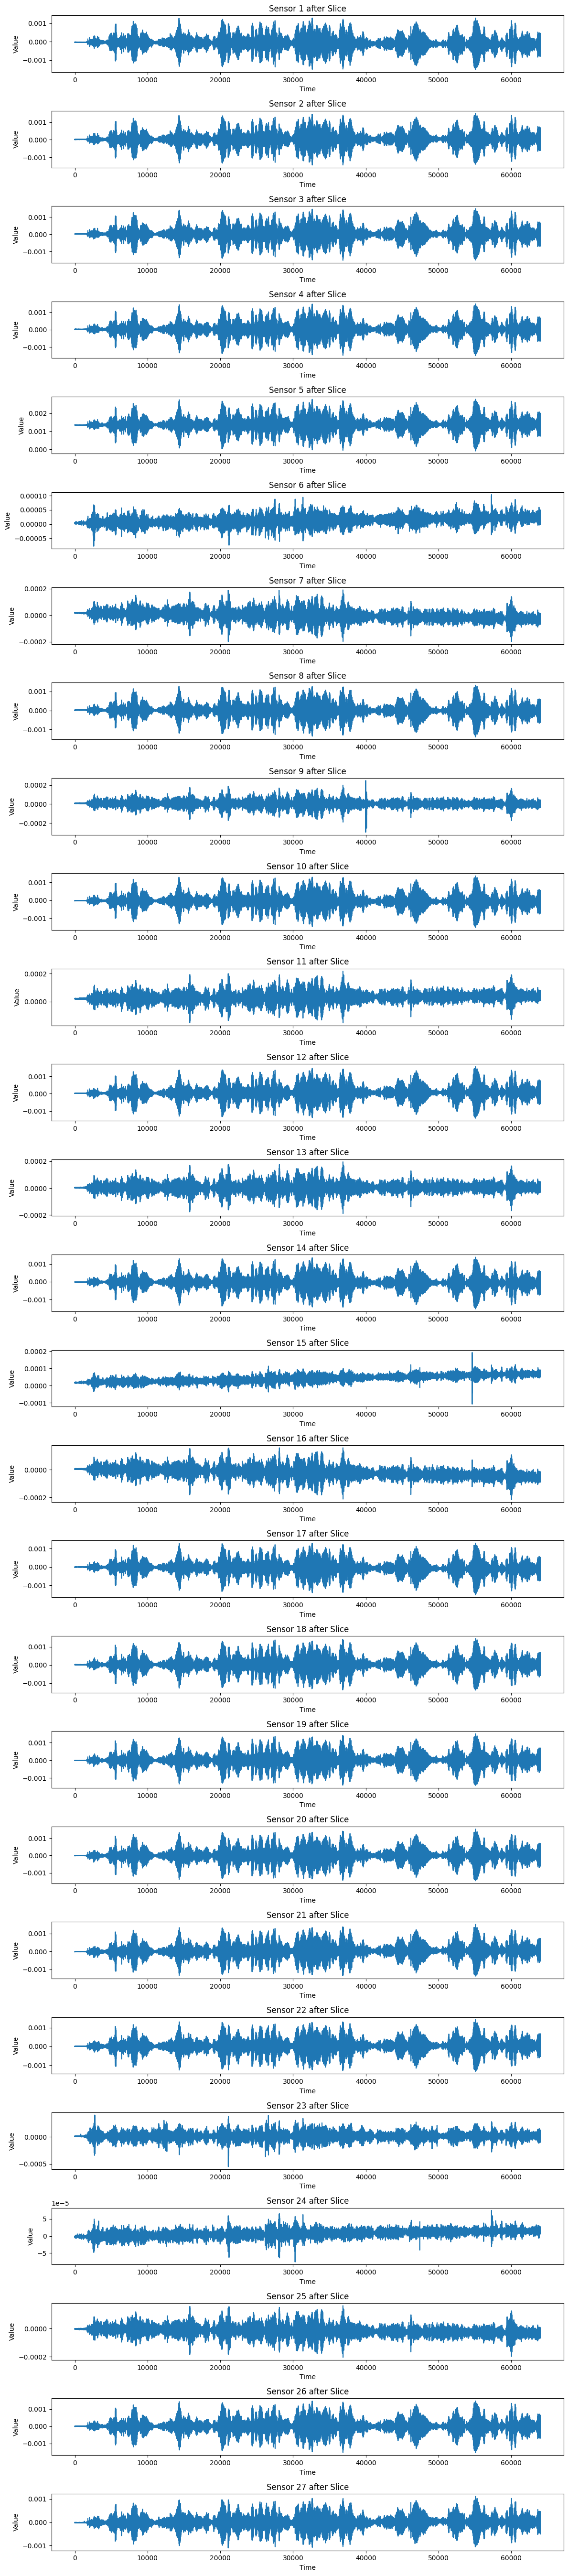

: 

In [ ]:
import matplotlib.pyplot as plt

# Cắt dữ liệu (nếu chưa cắt)
Data = final_array[0, :, :] # Lấy Case đầu tiên là 0.
#Data = Data[:, :]  # Kết quả shape: (27, 64000)
print(Data.shape)       # (27, 64000)
print(Data.ndim)        # 2
print(type(Data))       # <class 'numpy.ndarray'>

# Vẽ 27 sensor đầu tiên
fig, axes = plt.subplots(27, 1, figsize=(12, 54))  # 8 hàng, 1 cột
for i in range(27):
    axes[i].plot(Data[i])
    axes[i].set_title(f'Sensor {i+1} after Slice')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Value')
plt.tight_layout()
plt.show()

## EXTRACT FROM A SENSOR

In [ ]:
# 4. Tách dữ liệu sau trích xuất
import numpy as np
from sklearn.model_selection import train_test_split

# Tách dữ liệu các sensor riêng biệt
Data1 = Data[SELECT_SENSOR-1, step_start:step_finish]      # Lấy dữ liệu của sensor

print("Du lieu dau tien sau khi slice:")
print(Data1.shape)
print(Data1)
print(Data1.ndim)
print(len(Data1))

# Vẽ biểu đồ
plt.figure(figsize=(16, 8))  # Đặt kích thước rộng 16 inches, cao 8 inches
plt.plot(Data1, label="Original Data")
plt.legend()
plt.show()

# Vẽ biểu đồ chỉ cho 1000 timesteps
plt.figure(figsize=(16, 8))  # Đặt kích thước rộng 16 inches, cao 8 inches
plt.plot(Data1[:2000], label="Original Data")
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.legend()
plt.show()

# Vẽ biểu đồ chỉ cho 1000 timesteps
plt.figure(figsize=(16, 8))  # Đặt kích thước rộng 16 inches, cao 8 inches
plt.plot(Data1[2000:4000], label="Original Data")
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.legend()
plt.show()
# Vẽ biểu đồ chỉ cho 1000 timesteps
plt.figure(figsize=(16, 8))  # Đặt kích thước rộng 16 inches, cao 8 inches
plt.plot(Data1[4000:6000], label="Original Data")
plt.xlabel("Timesteps")
plt.ylabel("Values")
plt.legend()
plt.show()


NameError: name 'select_sensor' is not defined

## ĐẶC TRƯNG THỐNG KÊ

In [ ]:
import math
from scipy import stats
import pandas as pd

# Giả sử Data1 là list hoặc array của bạn

# Tính toán các đặc trưng thống kê bằng Python thuần và SciPy
features = {
    'mean': sum(Data1) / len(Data1),
    'median': sorted(Data1)[len(Data1) // 2],  # Nếu số phần tử là lẻ, lấy phần tử ở giữa
    'std': math.sqrt(sum((x - (sum(Data1) / len(Data1))) ** 2 for x in Data1) / len(Data1)),
    'var': sum((x - (sum(Data1) / len(Data1))) ** 2 for x in Data1) / len(Data1),
    'min': min(Data1),
    'max': max(Data1),
    'range': max(Data1) - min(Data1),
    'skewness': stats.skew(Data1),
    'kurtosis': stats.kurtosis(Data1),
    'percentile_25': sorted(Data1)[int(len(Data1) * 0.25)],
    'percentile_75': sorted(Data1)[int(len(Data1) * 0.75)],
    'iqr': sorted(Data1)[int(len(Data1) * 0.75)] - sorted(Data1)[int(len(Data1) * 0.25)],
    'mode': stats.mode(Data1, keepdims=False).mode.item()  # 🔥 FIXED
}

# Chuyển kết quả thành DataFrame
df = pd.DataFrame(list(features.items()), columns=['Feature', 'Value'])

# Lưu kết quả vào file CSV
df.to_csv('statistics_features.csv', index=False)

# In kết quả
print("Kết quả đã được lưu vào file 'statistics_features.csv'.")


: 

: 

: 

In [ ]:
# Plot Histogram.

import matplotlib.pyplot as plt
import seaborn as sns

# Tùy chỉnh biểu đồ với kích thước lớn hơn
plt.figure(figsize=(12, 6))  # Tăng kích thước biểu đồ

# Vẽ histogram với KDE (đường tần suất)
sns.histplot(Data1, bins=70, kde=True, color='skyblue', edgecolor='black', alpha=0.7)

# Tùy chỉnh trục X để có độ rộng rõ ràng hơn
plt.xlim(min(Data1), max(Data1))  # Điều chỉnh giới hạn trục X

# Tùy chỉnh biểu đồ
plt.title('Histogram với KDE')
plt.xlabel('Giá trị')
plt.ylabel('Tần suất')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

: 

: 

: 

## TẠO SAMPLE

In [ ]:
# 6. Tạo các sample (X,y)
# 6.1. Hàm tạo sliding window
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i : i + input_steps])  # 50 timestep làm input
        y.append(data[i + input_steps : i + input_steps + output_steps])  # 5 timestep làm output
    return np.array(X), np.array(y)



# 6.2.Xáo trộn dữ liệu
indices = np.arange(len(X))  # Tạo một mảng chỉ mục (indices) có giá trị từ 0 đến len(X) - 1, tương ứng với số lượng mẫu trong tập dữ liệu X. Ví dụ: Nếu X có 5 mẫu, thì indices sẽ là [0, 1, 2, 3, 4]
np.random.shuffle(indices)   # Xáo trộn ngẫu nhiên các chỉ mục trong indices để thay đổi thứ tự dữ liệu. Ví dụ: [0, 1, 2, 3, 4] có thể trở thành [3, 0, 4, 1, 2].
X, y = X[indices], y[indices]  # Sắp xếp lại tập dữ liệu X và nhãn y theo thứ tự mới của indices. Điều này giúp xáo trộn dữ liệu đồng bộ giữa đầu vào X và nhãn y, đảm bảo dữ liệu vẫn được gán đúng nhãn sau khi xáo trộn

# 6.3. Chia dữ liệu thành train (70%), validation (15%), test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X, y = create_sequences(Data1, input_steps, output_steps)

# Kiểm tra kích thước
print("Train shape: ", X_train.shape, y_train.shape)
print("Validation shape: ", X_val.shape, y_val.shape)
print("Test shape: ", X_test.shape, y_test.shape)

: 

: 

: 

## MIN-MAX SCALING

In [ ]:
# Hàm scale_data(train_data, validate_data, test_data) được sử dụng để chuẩn hóa dữ liệu bằng phương pháp Min-Max Scaling.
# Chuẩn hóa giúp dữ liệu nằm trong một phạm vi nhất định (thường là từ 0 đến 1), làm cho mô hình học hiệu quả hơn.
# Chuẩn hóa dữ liệu (test_data) theo cùng thang đo với dữ liệu huấn luyện.
# Trả về dữ liệu đã chuẩn hóa.

max_scaler = Data1.max() # Max của toàn bộ tập dữ liệu kể cả validate, test.
min_scaler = Data1.min() # Min của toàn bộ tập dữ liệu kể cả validate, test.

print("max_scaler = " + str(max_scaler))
print("min_scaler = " + str(min_scaler))

print("Truoc khi chuan hoa: ")
print(X_train[0], y_train[0])
def scale_data(X_train, y_train, X_val, y_val, X_test, y_test):
    X_train_scaled = (X_train - min_scaler) / (max_scaler - min_scaler)
    y_train_scaled = (y_train - min_scaler) / (max_scaler - min_scaler)

    X_val_scaled = (X_val - min_scaler) / (max_scaler - min_scaler)
    y_val_scaled = (y_val - min_scaler) / (max_scaler - min_scaler)

    X_test_scaled = (X_test - min_scaler) / (max_scaler - min_scaler)
    y_test_scaled = (y_test - min_scaler) / (max_scaler - min_scaler)
 
    return X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled 

X_train_scaled, y_train_scaled, X_val_scaled, y_val_scaled, X_test_scaled, y_test_scaled  = scale_data(X_train, y_train, X_val, y_val, X_test, y_test)
print("Sau khi chuan hoa: ")
print(X_train_scaled[0], y_train_scaled[0])

# Lưu Min-Max Scaler để dùng lại khi predict (không cần chạy lại Model):
# Lưu vào file .npy với NumPy
np.save("scaler_values.npy", np.array([min_scaler, max_scaler]))
# Khi cần gọi lấy giá trị, Tải lại giá trị đã lưu
# min_scaler, max_scaler = np.load("scaler_values.npy")

: 

: 

: 

## CHECK SHAPE

In [ ]:
print("Ket qua truoc khi reshape:")
print("X_train_scaled: " + str(X_train_scaled.shape))
print("X_val_scaled: " + str(X_val_scaled.shape))
print("X_test_scaled: " + str(X_test_scaled.shape))
print("-------------------------------------------")
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], n_features))
X_val_scaled = X_val_scaled.reshape((X_val_scaled.shape[0], X_val_scaled.shape[1], n_features))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], n_features))
print("Ket qua sau khi reshape:")
print("X_train_scaled: " + str(X_train_scaled.shape))
print("X_val_scaled: " + str(X_val_scaled.shape))
print("X_test_scaled: " + str(X_test_scaled.shape))

: 

: 

: 

## MODEL TRAINING

### BUILD MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Residual Block cho TCN
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, dilation_rate, dropout_rate=0.2):
        super().__init__()
        self.conv1 = layers.Conv1D(filters, kernel_size, padding='causal',
                                   dilation_rate=dilation_rate)
        self.relu1 = layers.Activation('relu')
        self.dropout1 = layers.Dropout(dropout_rate)

        self.conv2 = layers.Conv1D(filters, kernel_size, padding='causal',
                                   dilation_rate=dilation_rate)
        self.relu2 = layers.Activation('relu')
        self.dropout2 = layers.Dropout(dropout_rate)

        self.downsample = None
        self.final_relu = layers.Activation('relu')
        self.filters = filters

    def build(self, input_shape):
        in_channels = input_shape[-1]
        if in_channels != self.filters:
            self.downsample = layers.Conv1D(self.filters, kernel_size=1, padding='same')
        super().build(input_shape)

    def call(self, x, training=False):
        residual = x
        if self.downsample is not None:
            residual = self.downsample(x)

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x, training=training)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x, training=training)

        return self.final_relu(x + residual)

# TCN Model
class TCN_Model(tf.keras.Model):
    def __init__(self, num_blocks=4, filters=64, kernel_size=3, target_len=5):
        super().__init__()

        self.tcn_blocks = tf.keras.Sequential()
        for i in range(num_blocks):
            dilation_rate = 2 ** i
            self.tcn_blocks.add(ResidualBlock(filters, kernel_size, dilation_rate))

        # Lấy bước thời gian cuối cùng
        self.last_time_step = layers.Lambda(lambda x: x[:, -1, :])  # shape (batch, features)

        # Fully connected layers
        self.fc1 = layers.Dense(128, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.out = layers.Dense(target_len)  # output sequence

    def call(self, x, training=False):
        x = self.tcn_blocks(x, training=training)  # (batch, time, filters)
        x = self.last_time_step(x)                 # (batch, filters)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.out(x)                         # (batch, target_len)


: 

: 

: 

### tf DATASET

In [ ]:
batch_size = 64

train_ds = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train_scaled)).shuffle(1000).batch(batch_size)
val_ds = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val_scaled)).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test_scaled)).batch(batch_size)

: 

: 

: 

### TRAINING MODEL

In [ ]:
import time
import pandas as pd
import tensorflow as tf

# Khởi tạo model TCN
model = TCN_Model(num_blocks=4, filters=64, kernel_size=3, target_len=output_steps)
model.build(input_shape=(None, input_steps, 1))
model.summary()

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(
    patience=20,
    restore_best_weights=True,
    monitor='val_loss'
)
csv_logger = tf.keras.callbacks.CSVLogger("training_log.csv", append=False)

# Đo thời gian huấn luyện
start_time = time.time()

# Fit model
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=1000,
    batch_size=64,
    callbacks=[early_stop, csv_logger],
    verbose=1
)

training_time = round(time.time() - start_time, 2)
print(f"✅ Huấn luyện hoàn tất sau {training_time} giây.")

# Lưu thời gian ra file
pd.DataFrame({"Training Time (s)": [training_time]}).to_csv("training_time.csv", index=False)


: 

: 

: 

### Model saving

In [ ]:
import pickle
import pandas as pd

# === 1. Lưu mô hình dưới dạng TensorFlow SavedModel (phù hợp với TF 2.10.1) ===
model.save("model_saved", save_format="tf")  # Lưu dưới dạng thư mục
print("✅ Đã lưu model tại thư mục model_saved/")

# === 2. Lưu lịch sử huấn luyện (history) bằng pickle để dùng vẽ biểu đồ sau ===
with open("history_saved.pkl", "wb") as f:
    pickle.dump(history.history, f)
print("✅ Đã lưu history tại history_saved.pkl")

# === 3. Lưu log huấn luyện thành CSV (phân tích/trực quan bằng Excel/Pandas) ===
df = pd.DataFrame({
    "Epoch": list(range(1, len(history.history['loss']) + 1)),
    "Train Loss": history.history['loss'],
    "Train MAE": history.history['mean_absolute_error'],
    "Val Loss": history.history['val_loss'],
    "Val MAE": history.history['val_mean_absolute_error'],
})
df.to_csv("training_log.csv", index=False)
print("✅ Đã lưu training log tại training_log.csv")


: 

: 

: 

### Loss curves

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ Loss MSE
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()

# Vẽ biểu đồ MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

: 

: 

: 

### Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Đánh giá mô hình trên tập test (evaluate)
test_metrics = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test metrics (loss + metrics): {test_metrics}")

# 2. Dự đoán trên train, val, test
y_train_pred_scaled = model.predict(X_train_scaled)
y_val_pred_scaled = model.predict(X_val_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

# Chuyển về dạng 2D (n_samples, out_steps) nếu cần
y_train_real = y_train_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler
y_val_real = y_val_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler
y_test_real = y_test_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler

y_train_pred = y_train_pred_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler
y_val_pred = y_val_pred_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler
y_test_pred = y_test_pred_scaled.squeeze() * (max_scaler - min_scaler) + min_scaler

print("Average value of train data = " + str(np.mean(y_train_real)))
print("Average value of val data = " + str(np.mean(y_val_real))) 
print("Average value of test data = " + str(np.mean(y_test_real)))

# Tính các chỉ số
def calc_metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

rmse_train, mae_train, r2_train = calc_metrics(y_train_real, y_train_pred)
rmse_val, mae_val, r2_val = calc_metrics(y_val_real, y_val_pred)
rmse_test, mae_test, r2_test = calc_metrics(y_test_real, y_test_pred)

print("Đánh giá mô hình:")
print(f"Train    - RMSE: {rmse_train:.4f}, MAE: {mae_train:.4f}, R²: {r2_train:.4f}")
print(f"Validate - RMSE: {rmse_val:.4f}, MAE: {mae_val:.4f}, R²: {r2_val:.4f}")
print(f"Test     - RMSE: {rmse_test:.4f}, MAE: {mae_test:.4f}, R²: {r2_test:.4f}")

# Lưu kết quả đánh giá mô hình
metrics_df = pd.DataFrame({
    "Dataset": ["Train", "Validation", "Test"],
    "RMSE": [rmse_train, rmse_val, rmse_test],
    "MAE": [mae_train, mae_val, mae_test],
    "R2": [r2_train, r2_val, r2_test]
})

metrics_df.to_csv("metrics.csv", index=False)
print("Metrics saved to metrics.csv")


: 

: 

: 